# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df

,reviews
0,✅ Trip Verified | Another BA Shambles. Starte...
1,Not Verified | BA cancelled my flight home to...
2,"Not Verified | BA cancelled my flight home, t..."
3,✅ Trip Verified | Turned up 3.5 hours in advan...
4,Not Verified | Boarding – at gate at LGW they...
...,...
995,✅ Trip Verified | London to Muscat first clas...
996,✅ Trip Verified | My family and I travelled f...
997,✅ Trip Verified | Gatwick to Madeira. The fli...
998,✅ Trip Verified | London to Casablanca. Their ...


In [ ]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
##Analysis

In [ ]:
dfn = []
for index, row in df.iterrows():
    dfn.append(row['reviews'].split('|')[1])

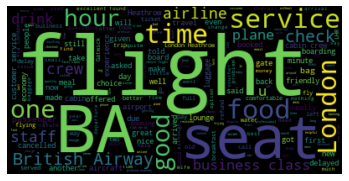

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def create_wordcloud(sentences):
    text = ""
    for sentence in sentences:
        text += sentence
    wordcloud = WordCloud().generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
create_wordcloud(dfn)


In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
np.random.seed(2018)
newStopwords = STOPWORDS.union(set(['flight', "british", "airway", 'ba', 'london', 'heathrow']))
def lemmatize_stemming(text):
    stemmer = SnowballStemmer("english")
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in newStopwords:
            result.append(lemmatize_stemming(token))
    return result
processed_docs = [preprocess(doc) for doc in dfn]
processed_docs = [preprocess(doc) for doc in dfn]
dictionary = gensim.corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
lda_model = gensim.models.LdaModel(corpus=corpus,
                                   id2word=dictionary,
                                   num_topics=10,
                                   random_state=100,
                                   update_every=1,
                                   chunksize=10,
                                   passes=10,
                                   alpha='auto',
                                   per_word_topics=True)

# print the model's topics
lda_model.print_topics()

[(0,
  '0.054*"airlin" + 0.034*"fli" + 0.031*"book" + 0.031*"custom" + 0.030*"tell" + 0.026*"say" + 0.023*"tri" + 0.023*"year" + 0.022*"day" + 0.021*"servic"'),
 (1,
  '0.120*"airway" + 0.037*"point" + 0.035*"ticket" + 0.024*"chang" + 0.022*"qanta" + 0.019*"abl" + 0.019*"singapor" + 0.017*"averag" + 0.017*"wast" + 0.017*"thank"'),
 (2,
  '0.033*"trip" + 0.033*"extra" + 0.032*"rebook" + 0.029*"differ" + 0.024*"problem" + 0.019*"fare" + 0.019*"onlin" + 0.018*"ve" + 0.016*"follow" + 0.016*"relat"'),
 (3,
  '0.078*"check" + 0.038*"return" + 0.030*"go" + 0.025*"minut" + 0.020*"allow" + 0.018*"littl" + 0.018*"pass" + 0.017*"hard" + 0.017*"way" + 0.016*"sit"'),
 (4,
  '0.053*"seat" + 0.024*"food" + 0.024*"servic" + 0.024*"crew" + 0.020*"board" + 0.019*"class" + 0.019*"good" + 0.018*"cabin" + 0.017*"time" + 0.017*"busi"'),
 (5,
  '0.075*"hour" + 0.057*"bag" + 0.048*"delay" + 0.037*"arriv" + 0.033*"airport" + 0.027*"luggag" + 0.022*"connect" + 0.021*"miss" + 0.020*"baggag" + 0.018*"late"'),
 (6

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 33.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=fa8d80fcb6bf33b87af425a2875dddf521a38a911e6887723bbfa97444416521
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=1dd0d9b879b395375142914b66be9f13ce954cf60519f5bcaadf3d3e31d20ef4
  Stored in directory: /root/.cache/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built pyLDAvis sklearn


In [ ]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable
/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.390437 -0.066584       1        1  36.384644
0      0.167479  0.077005       2        1  11.613815
3     -0.068277 -0.340513       3        1   9.284473
7     -0.090461  0.143720       4        1   9.095519
5      0.026874  0.170988       5        1   8.835866
6     -0.081481 -0.020257       6        1   5.901747
9     -0.085416 -0.019136       7        1   5.169107
2     -0.092628  0.023946       8        1   5.067142
1     -0.068618  0.007116       9        1   4.347207
8     -0.097908  0.023714      10        1   4.300479, topic_info=        Term         Freq        Total Category  logprob  loglift
79      seat  1174.000000  1174.000000  Default  30.0000  30.0000
15     check   443.000000   443.000000  Default  29.0000  29.0000
337   airway   318.000000   318.000000  Default  28.0000  28.0000
117     hour   405.000000   405.000000  Default  27.0000  27.0000
137   airlin   456.000000   456.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
983   finish    21.535390    22.281496  Topic10  -4.8053   3.1124
985    smile    21.421669    22.167882  Topic10  -4.8106   3.1122
624  purchas    20.504990    21.251243  Topic10  -4.8543   3.1107
227      ask    80.169528   176.295469  Topic10  -3.4908   2.3584
236     come    27.928200   138.103199  Topic10  -4.5453   1.5481

[369 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
430       9  0.981833     abl
99        4  0.989404  accept
752       8  0.975906  actual
1094      6  0.989678     add
736       8  0.987652   addit
...     ...       ...     ...
855       4  0.973597   worth
591       6  0.953303   write
220       5  0.994487   wrong
172       2  0.761219    year
172       6  0.233123    year

[369 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 4, 8, 6, 7, 10, 3, 2, 9])

In [ ]:
dtaSenti = [word for word, prob in lda_model.show_topic(1, topn=10000)]

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sia = SentimentIntensityAnalyzer()
scores = sia.polarity_scores(' '.join([str(elem) for elem in dtaSenti]))
# Determine the overall sentiment
if scores['compound'] > 0:
    sentiment = "positive"
elif scores['compound'] < 0:
    sentiment = "negative"
else:
    sentiment = "neutral"
    
senti = pd.DataFrame(scores.items())
senti.rename(columns={0:'Sentiments',1:'Scores'},inplace = True)
senti.mul({'Sentiments':1,'Scores':100})

,Sentiments,Scores
0,neg,10.30
1,neu,80.00
2,pos,9.70
3,compound,-96.65
